In [1]:
!pip install tensorflow tensorboard keras jupyter-tensorboard

In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [6]:
display(X_train.shape)
display(X_train[0][0])

(60000, 784)

0

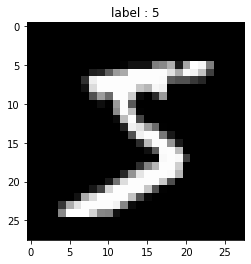

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [8]:
X_train[0].shape

(784,)

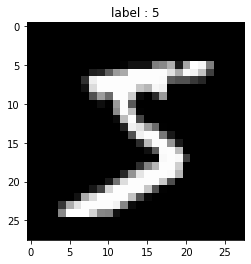

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [9]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

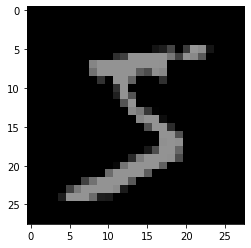

In [10]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# 前処理

In [11]:
#０～１のfloat型に変換
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


# one-hot表現(y_train)

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train.shape)
print(y_test_one_hot.shape)

(60000,)
(60000, 10)
float64
(60000,)
(10000, 10)


# train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [14]:
print(y_val.shape)
print(X_val.shape)
print(y_test.shape)
print(X_test.shape)

(12000,)
(12000, 784)
(10000,)
(10000, 784)


# ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。  

今回はバッチサイズを20とします。今回使う訓練用データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練用データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。  

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [15]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [16]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 1, 9, 2, 5, 0, 6, 7, 7, 1, 1, 9, 7, 9, 0, 6, 6, 5, 1, 2],
      dtype=uint8))


In [17]:
print(y_train)

[0 5 3 ... 4 6 1]


# 雛型

In [18]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, epoch=5, n_nodes1=400, n_nodes2=200, sigma=0.01, batch_size=20, n_output=10, lr=0.01, verbose = True, seed=0):
        
        self.verbose = verbose #ロスを出力するか否か
        #self.n_features = n_features # 特徴量
        self.n_nodes1 = n_nodes1# 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.sigma = sigma # ガウス分布の標準偏差
        self.batch_size = batch_size # バッチサイズ
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.lr = lr #学習率
        self.epoch = epoch #エポック
        
        #lossの記録する配列
        self.loss_list = []
        self.val_loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        #訓練用データが一次元なら二次元に変更
        if y.ndim == 1:
            y = y[:, np.newaxis]
        #検証用データ有り
        if X_val is not None and y_val is not None and y_val.ndim == 1:
            y_val = y_val[:, np.newaxis]

        # one-hot-encode
        from sklearn.preprocessing import OneHotEncoder
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
        y_test_one_hot = enc.transform(y_test[:, np.newaxis])
            
        #重みとバイアスの初期化
        n_features = X.shape[1]
        
        self.w1 = self._w_gain(n_features, self.n_nodes1)
        self.w2 = self._w_gain(self.n_nodes1, self.n_nodes2)
        self.w3 = self._w_gain(self.n_nodes2, self.n_output)
        self.b1 = self._w_gain(self.n_nodes1, 1).ravel()
        self.b2 = self._w_gain(self.n_nodes2, 1).ravel()
        self.b3 = self._w_gain(self.n_output, 1).ravel()
        
#         #lossを記録するリスト
#         self.val_loss_list = []
#         self.loss_list = []
        
        
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=20)
            for mini_X_train, mini_y_train in get_mini_batch:
                if mini_y_train.ndim == 1:
                    mini_y_train = mini_y_train[:, np.newaxis]
                    
                self._forward(mini_X_train)
                loss = self._loss_function(mini_X_train, mini_y_train)
                self._backpropagation(mini_X_train, mini_y_train)
                
            #lossをリストに格納
            self.loss_list.append(loss)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                for mini_X_val, mini_y_val in get_mini_batch:
                    if mini_y_val.ndim == 1:
                        mini_y_val = mini_y_val[:, np.newaxis]

                    self._forward(mini_X_val)
                    val_loss = self._loss_function(mini_X_val, mini_y_val)
                    self._backpropagation(mini_X_val, mini_y_val)
                    
                #検証用データ有り
                if X_val is not None and y_val is not None:
                    #検証用データの損失をリストに格納していく
                    self.val_loss_list.append(val_loss)       
            
            #verboseをTrueにした際は学習過程を出力
            if self.verbose== True:
                print("学習用データは : {}".format(self.loss_list))
                # 検証用データ有り
                if X_val is not None and y_val is not None:
                    print("検証用データは : {}".format(self.val_loss_list))
            
    def _w_gain(self, n_feature, n_node): # 重みの初期値を決めるメソッド
        np.random.seed(seed=0)
        W = self.sigma * np.random.randn(n_feature, n_node) # 第一層の重み
        
        return W
    
    
    def _sigmoid(self, X): # 仮定関数sigmoidメソッドを定義する
        '''
        Parmeter
        ----------
        z : ndarray, shape ( n_samples, 1)
        
        Return
        ----------
        シグモイド関数
        '''
        #x_sig = np.dot(X, self.coef_.T) # n_sample * 1
        
        return 1 / (1 + np.exp(-X))
    
    def tanh(self, X): # ハイパボリックタンジェント関数
        
        #(np.exp(X)-np.exp(-X)) / (np.exp(X) + np.exp(-X))
        
        return np.tanh(X)
    
    def softmax(self, X): # ソフトマックス関数

        exp_a = np.exp(X)
        sum_exp_a = np.sum(exp_a, axis=1).reshape(-1, 1)
        
        return exp_a / sum_exp_a

    
    def _forward(self, X):
        
        f = self.tanh
        
        self.a1 = X@self.w1 + self.b1
        self.z1 = f(self.a1)
        self.a2 = self.z1@self.w2 + self.b2
        self.z2 = f(self.a2)
        self.a3 = self.z2@self.w3 + self.b3
        self.z3 = self.softmax(self.a3)
        
        #return self.z3
    
    def _loss_function(self, X, y):
        '''
        y : ndarray, size(batch_size, n_output)
            正解ラベル
        n_output : スカラー
            クラス数
        '''
        term_1 = self.batch_size
        term_2 = np.log(self.z3)
        
        L = -(1/term_1) * np.sum(y * term_2)
        
        return L
    
    def _backpropagation(self, X, y):
        '''
        X : ndarray, shape(batch_size, n_features)
            特徴量ベクトル
        y : ndarray, shape(batch_size, n_output)
        '''
        n = self.batch_size
        L_A3 = (self.z3 - y)
        L_B3 = np.sum(L_A3, axis=0)
        L_W3 = (self.z2.T)@L_A3
        L_Z2 = L_A3@self.w3.T

        self.w3 = self.w3 - self.lr*L_W3
        self.b3 = self.b3 - self.lr*L_B3

        L_A2 = L_Z2*(1- (self.tanh(self.a2)**2))
        L_B2 = np.sum(L_A2, axis=0)
        L_W2 = (self.z1.T)@L_A2
        L_Z1 = L_A2@self.w2.T

        self.w2 = self.w2 - self.lr*L_W2
        self.b2 = self.b2 - self.lr*L_B2

        L_A1 = L_Z1 * (1- (self.tanh(self.a1))**2)
        L_B1 = np.sum(L_A1, axis=0)
        L_W1 = (X.T)@L_A1

        self.w1 = self.w1 - self.lr*L_W1
        self.b1 = self.b1 - self.lr*L_B1

        #return self.w1, self.w2, self.w3, self.b1, self.b2, self.b3
    
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # 10個の確率の最大値のインデックスを取得
        f = self.tanh
        
        a1 = X@self.w1 + self.b1
        z1 = f(a1)
        a2 = z1@self.w2 + self.b2
        z2 = f(a2)
        a3 = z2@self.w3 + self.b3
        z3 = self.softmax(a3)
        
        idx = np.argmax(z3, axis=1)

        return idx
    
    def plot_loss(self, loss_list, val_loss_list=None):
        
        plt.figure(figsize=(13, 8))
        plt.title("Decrease of Loss", fontsize=13)
        plt.xlabel("Iteration ", fontsize=13)
        plt.ylabel("Loss", fontsize=13)
        plt.plot(range(len(self.loss_list)), self.loss_list, label="Loss")
        if val_loss_list is not None:
            plt.plot(range(len(self.val_loss_list)), self.val_loss_list, label="Val_Loss")
        plt.legend()
        plt.show()

# 学習

In [19]:
ssnnc = ScratchSimpleNeuralNetrowkClassifier(epoch=10, n_nodes1=400, n_nodes2=200, sigma=0.01, batch_size=128, n_output=10, lr=0.001, verbose = False)
ssnnc.fit(X_train, y_train)

# 推定

In [20]:
y_pred = ssnnc.predict(X_test)
print("Accuracyは{}".format(accuracy_score(y_test, y_pred)))

Accuracyは0.9586


# 可視化

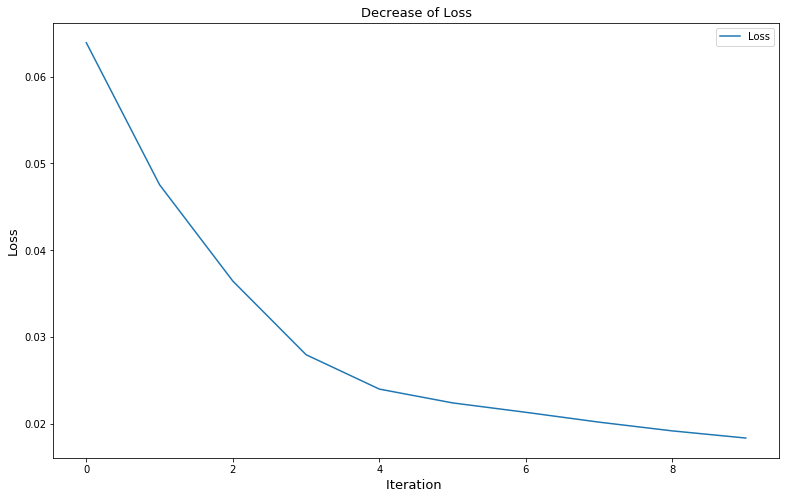

In [22]:
loss_list = ssnnc.loss_list
ssnnc.plot_loss(loss_list)

In [23]:
ssnnc = ScratchSimpleNeuralNetrowkClassifier(epoch=10, n_nodes1=400, n_nodes2=200, sigma=0.01, batch_size=128, n_output=10, lr=0.001, verbose = False)
ssnnc.fit(X_train, y_train, X_val, y_val)

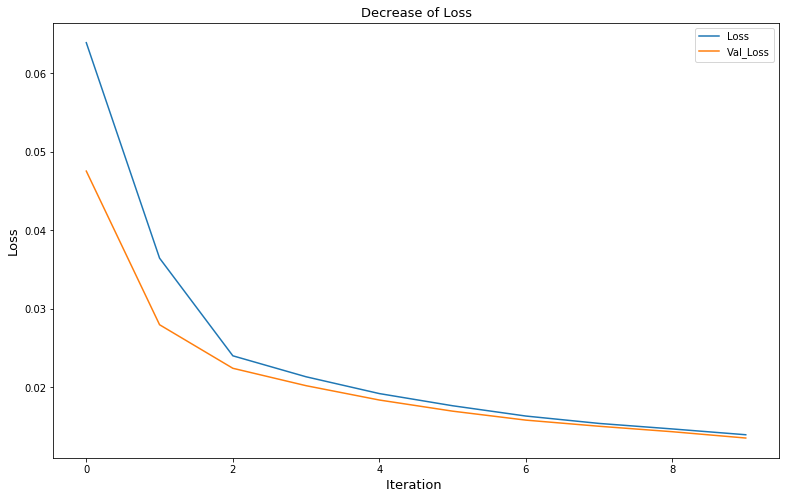

In [24]:
loss_list = ssnnc.loss_list
val_loss_list = ssnnc.val_loss_list

ssnnc.plot_loss(loss_list, val_loss_list)

# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

 ## 上記

# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 上記

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。

## 上記

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

## 上記

# 【問題5】推定
推定を行うメソッドを作成してください。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

## 上記

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

# 上記

# 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

# 上記